In [1]:
from pandas_datareader import data
import datetime
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

import korea_apartment_price

In [2]:
apts = korea_apartment_price.shortcuts.search('압구정동', '현대')
apts = [e for e in apts if e['name'].startswith('현대') and e['name'].find('빌라트') == -1 and e['name'].find('차') > -1]
apts = [e for e in apts if int(e['name'].replace('현대', '').split('차')[0]) in [6, 7] ]
apts

[{'address': '서울특별시 강남구 압구정동',
  'lawaddrcode': '1168011000',
  'name': '현대6차(78~81,83,84,86,87동)'},
 {'address': '서울특별시 강남구 압구정동',
  'lawaddrcode': '1168011000',
  'name': '현대7차(73~77,82,85동)'}]

In [3]:
sizes = set(korea_apartment_price.db.query_trades(apt_ids=apts, filters=[korea_apartment_price.db.pick_size]))
sizes

{43, 47, 59, 74}

In [4]:
orderbook = korea_apartment_price.shortcuts.fetch_orderbook(apt_id=apts[0], sizes=list(sizes))
orderbook

[{'price': 490000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 13),
  'floor': '저층',
  'apt_dong': '201'},
 {'price': 500000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 19),
  'floor': '8층',
  'apt_dong': '802'},
 {'price': 500000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 16),
  'floor': '8층',
  'apt_dong': '807'},
 {'price': 500000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 15),
  'floor': '14층',
  'apt_dong': '1406'},
 {'price': 500000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 8),
  'floor': '8층',
  'apt_dong': '803'},
 {'price': 500000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 1),
  'floor': '14층',
  'apt_dong': '1403'},
 {'price': 520000.0,
  'size': 43,
  'confirmed_at': datetime.date(2021, 10, 15),
  'floor': '고층',
  'apt_dong': '1001'},
 {'price': 550000.0,
  'size': 47,
  'confirmed_at': datetime.date(2021, 10, 15),
  'floor': '3층',
  'apt_dong': '304'}]

In [5]:
start_year = 2021
start_month = 1
start_date = 1

start_ymd = start_year * 10000 + start_month * 100 + start_date

In [6]:
trades = korea_apartment_price.db.query_trades(apt_ids=apts, date_from=start_ymd)
x1 = []
y1 = []
for e in trades:
    size_diff = min([abs(s - e['size'] * 0.3) for s in sizes])
    if size_diff > 1.0: continue
    x1.append(datetime.date(year=int(e['year']), month=int(e['month']), day=int(e['date'])))
    y1.append(int(e['price'] / int(e['size'] * 0.3)))
print(x1[0])

2021-01-10


In [7]:
df = data.DataReader("^KS11", "yahoo", datetime.datetime(start_year, start_month, start_date))
x2 = [e.date() for e in df.index]
y2 = df['Close'].to_list()

{'price': 490000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 13), 'floor': '저층', 'apt_dong': '201'}
{'price': 500000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 19), 'floor': '8층', 'apt_dong': '802'}
{'price': 500000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 16), 'floor': '8층', 'apt_dong': '807'}
{'price': 500000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 15), 'floor': '14층', 'apt_dong': '1406'}
{'price': 500000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 8), 'floor': '8층', 'apt_dong': '803'}
{'price': 500000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 1), 'floor': '14층', 'apt_dong': '1403'}
{'price': 520000.0, 'size': 43, 'confirmed_at': datetime.date(2021, 10, 15), 'floor': '고층', 'apt_dong': '1001'}
{'price': 550000.0, 'size': 47, 'confirmed_at': datetime.date(2021, 10, 15), 'floor': '3층', 'apt_dong': '304'}


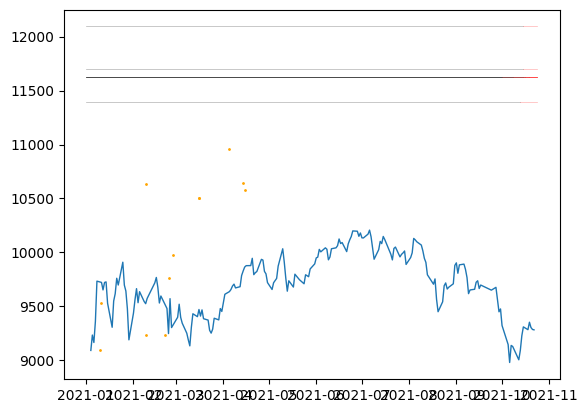

In [8]:
coeff = y1[0] / y2[0]

scaled_y2 = [v * coeff for v in y2]

plt.figure()
plt.scatter(x1, y1, s=1, color='orange')
plt.plot(x2, scaled_y2, linewidth=1)
ax = plt.gca()

now = datetime.datetime.now()
started_at = datetime.date(start_year, start_month, start_date)
for e in orderbook:
  price = e['price'] / e['size'] 
  l1 = mlines.Line2D([e['confirmed_at'], started_at], [price, price], color=(0.0, 0, 0, 0.3), linewidth=0.5)
  l2 = mlines.Line2D([e['confirmed_at'], now], [price, price], color=(1.0, 0, 0, 0.3), linewidth=0.5)
  ax.add_line(l1)
  ax.add_line(l2)
plt.show()